In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
sns.set()

In [2]:
ABS_PATH = "../../data/emo-at-cap/"

# reading all the annotations

In [3]:
annotations = [i for i in os.listdir(ABS_PATH) if i.endswith('csv')]

In [4]:
annotations

['emo-at-cap.csv']

In [5]:
df = pd.DataFrame()
for path in annotations:
    df = pd.concat([df, pd.read_csv(os.path.join(ABS_PATH,path))], axis=0)

In [6]:
df = df[['image_name', 'annotation', 'human_sentiment']]

In [7]:
df.drop_duplicates(subset=['image_name'], inplace=True)

In [8]:
display(df)

,image_name,annotation,human_sentiment
0,nm1055413_rm704041984_1977-4-2_2014.jpg,The man is running from something,Neutral
1,nm0000113_rm1310297088_1964-7-26_2006.jpg,The worried woman is carrying for the other woman,Positive
2,nm0001713_rm271353088_1970-6-4_1995.jpg,The man and the woman are trying to protect th...,Positive
3,nm4237013_rm663142144_1985-0-0_2003.jpg,The man is flirting with the woman,Positive
4,nm0000113_rm1350277376_1964-7-26_2007.jpg,The man and the woman are surprised by something,Positive
...,...,...,...
3835,nm0000704_rm3825510400_1981-1-28_2011.jpg,A couple is happily holding a baby,Positive
3836,._nm1715118_rm1685958144_1987-7-16_2008.jpg,A couple is enjoying the atmosphere and drinki...,Positive
3837,._nm0815418_rm3261959424_1969-8-16_2006.jpg,Three men are surprised with something while d...,Positive
3838,._nm0285913_rm780652032_1979-1-15_2013.jpg,Two men are serious during their conversation,Negative


In [9]:
df.dropna(how='any',inplace=True)

In [10]:
df.shape

(3840, 3)

# analysis

In [11]:
df.shape

(3840, 3)

In [12]:
df['image_name'].nunique()

3840

In [13]:
annotations = df['annotation'].values

In [14]:
def count_unique(annotations):
    tokens, counts = np.unique(np.hstack([i.split(' ') for i in annotations]), return_counts=True)
    count_tuple = sorted(list(zip(tokens, counts)),key= lambda x: x[1])[::-1]
    return count_tuple

In [15]:
def plot_barh(entity, title=''):
    keys, values = zip(*entity[::-1])
    plt.figure(figsize=(14,12))
    plt.barh(range(len(values)), values)
    plt.yticks(range(len(values)), keys)
    plt.title(title)

In [16]:
count_tuple = count_unique([i.lower() for i in annotations])

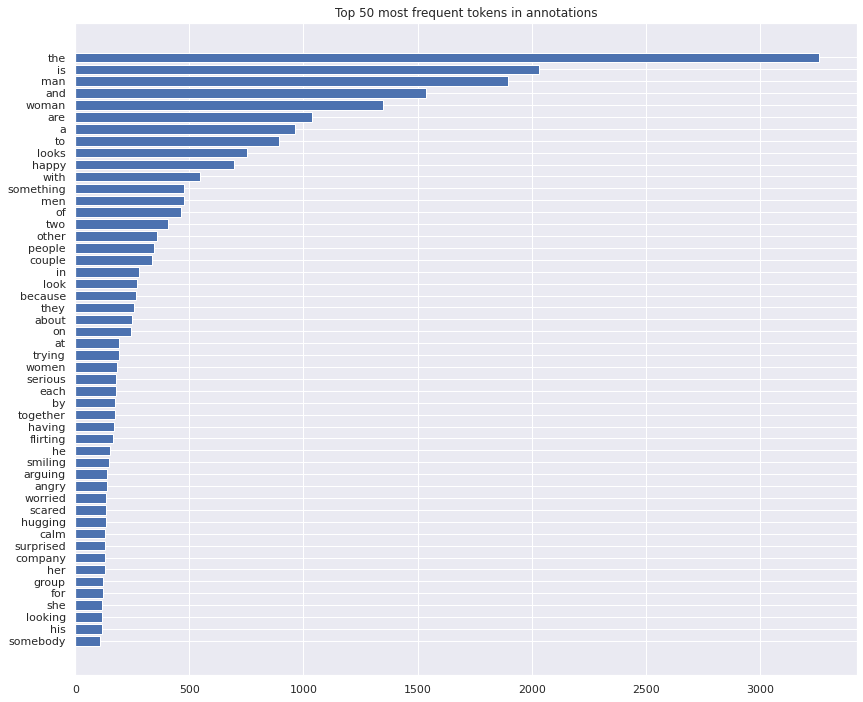

In [17]:
plot_barh(count_tuple[:50], 'Top 50 most frequent tokens in annotations')

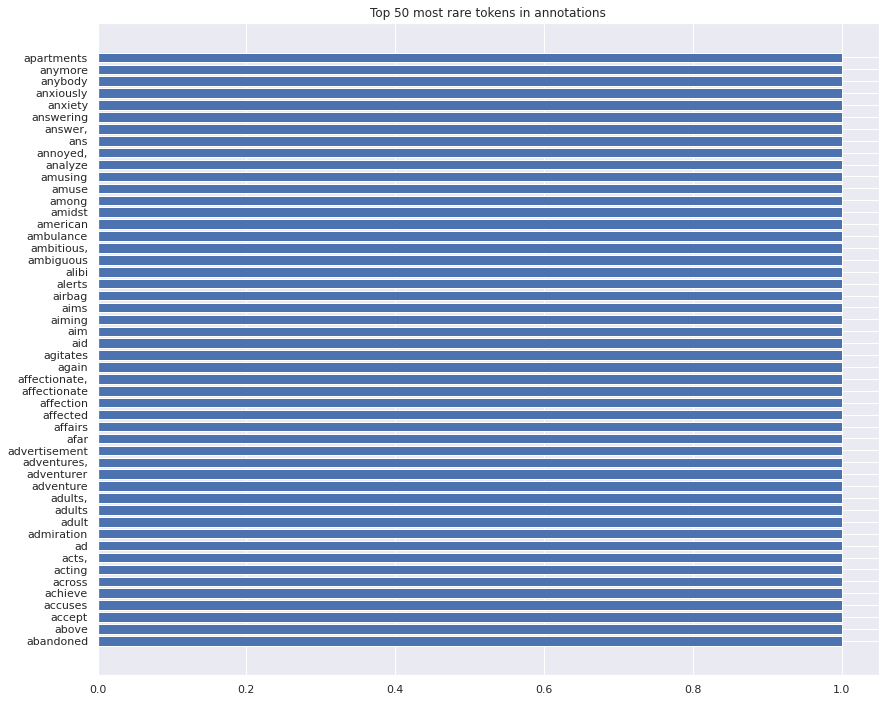

In [18]:
plot_barh(count_tuple[-50:], 'Top 50 most rare tokens in annotations')

In [19]:
len(count_tuple)

2313

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [21]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def stem(annotations):
    stemmer = PorterStemmer()
    stemmed_result = []
    stemmed_dict = {}
    for i in annotations:
        tmp = []
        for z in i.split(' '):
            tmp_stemmed = stemmer.stem(z)
            stemmed_dict.update({z:tmp_stemmed})
            tmp.append(tmp_stemmed)
        stemmed_result.append(' '.join(tmp))
    return stemmed_result, stemmed_dict

In [23]:
stemmed,stemmed_dict = stem(annotations)

In [24]:
unique_stemmed  = count_unique(stemmed)

In [25]:
len(unique_stemmed)

1826

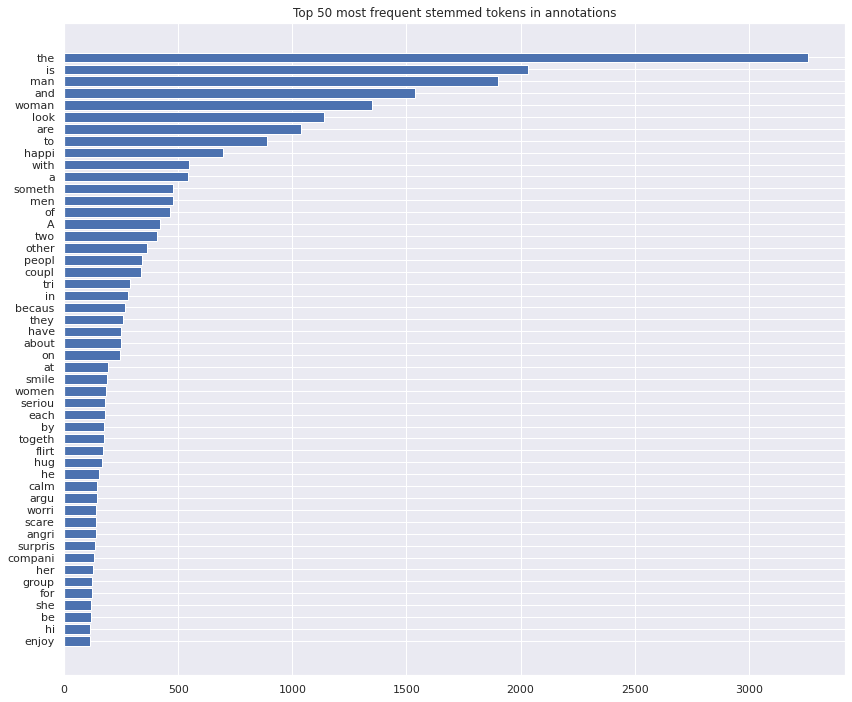

In [26]:
plot_barh(unique_stemmed[:50], 'Top 50 most frequent stemmed tokens in annotations')

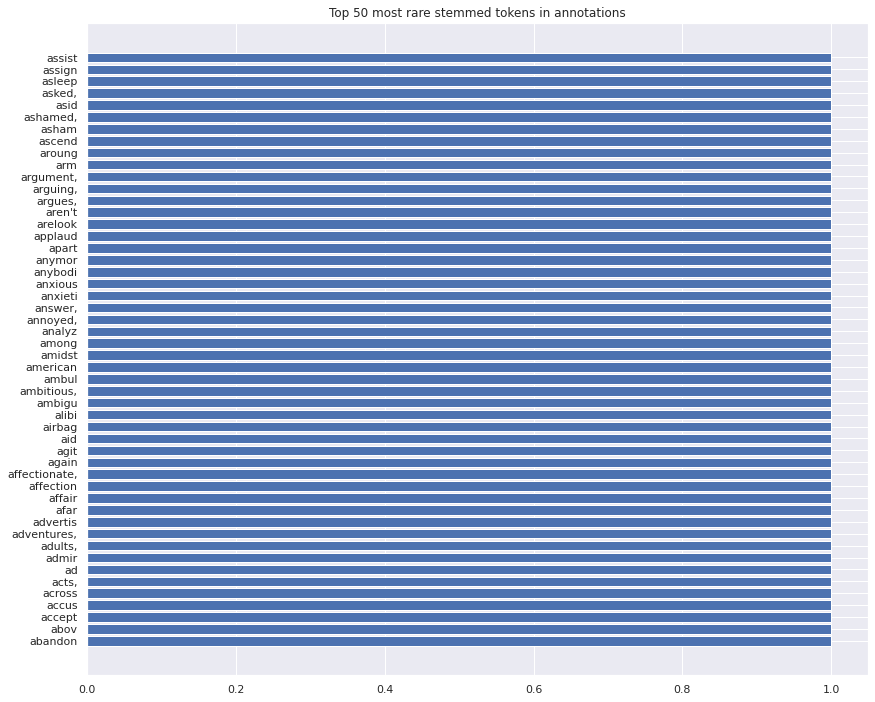

In [27]:
plot_barh(unique_stemmed[-50:], 'Top 50 most rare stemmed tokens in annotations')

# analysis in terms of sentiment

In [28]:
# import SentimentIntensityAnalyzer class 
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
    sid_obj = SentimentIntensityAnalyzer() 
    sentece = ''.join(' '+i+' ' if i in [',','.','!','?'] else i for i in sentence).strip()
    compounds = dict([(i,sid_obj.polarity_scores(i)['compound']) for i in sentence.split(' ') if sid_obj.polarity_scores(i)['compound']!=0])
    compound_score = sid_obj.polarity_scores(sentence)['compound']
    if compound_score >= 0.05 : 
        sentiment = "Positive"
  
    elif compound_score <= - 0.05 : 
        sentiment = "Negative" 
  
    else : 
        sentiment =  "Neutral" 
    return sentiment, compounds

In [33]:
value_counts = df['human_sentiment'].value_counts()
sizes = value_counts.values.tolist()
labels = value_counts.index.tolist()

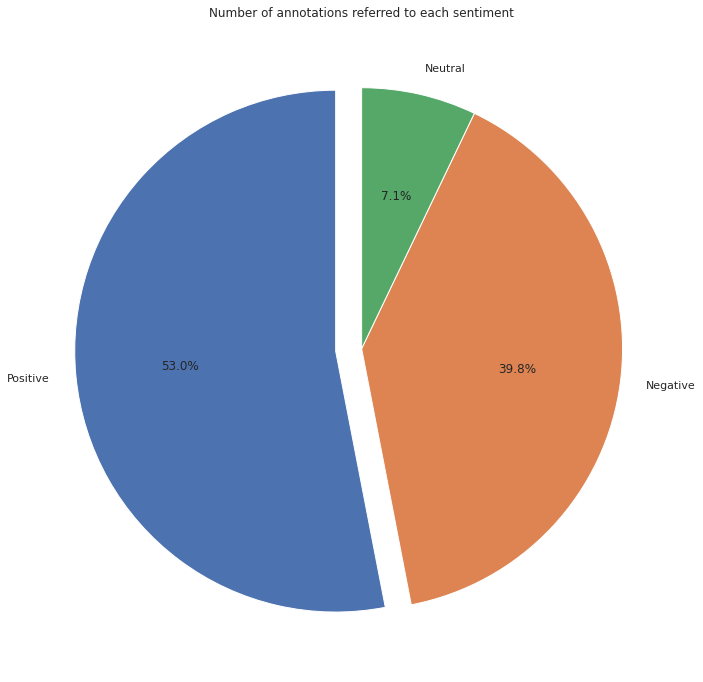

In [34]:
plt.figure(figsize=(14,12))
plt.pie(sizes, labels=labels, explode=(0.1,0,0),startangle=90,
       autopct='%1.1f%%')
plt.title('Number of annotations referred to each sentiment');

In [43]:
sentiment = np.array(sentiment)
annotations = np.array(annotations)
idx_neg = np.random.choice(np.where(sentiment=='Negative')[0], 1)
idx_pos = np.random.choice(np.where(sentiment=='Positive')[0], 1)
idx_neu = np.random.choice(np.where(sentiment=='Neutral')[0], 1)
print('Positive sentence example : {}'.format(annotations[idx_pos][0]))
print('Negative sentence example : {}'.format(annotations[idx_neg][0]))
print('Neutral sentence example : {}'.format(annotations[idx_neu][0]))

Positive sentence example : A stylish woman looks with dignity on the man in casual who is trying to explain something
Negative sentence example : A boy looks like evil genius and is selfish
Neutral sentence example : Two men discussing something


# visualizing annotations

In [35]:
from PIL import Image

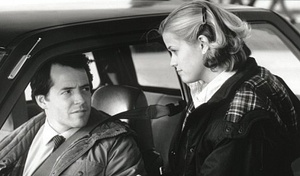

The man in the car is interrupted by woman


In [68]:
idx = np.random.choice(df.index,1)[0]
sampled = df.iloc[idx]
path = os.path.join(ABS_PATH,'images')
files = os.listdir(path)
image = sampled['image_name']
if image in files:
    display(Image.open(os.path.join(path, image)))
    print(sampled['annotation'])